## Домашнее задание 9
### Градиентный бустинг

В данном домашнем задании мы изучим применение градиентного бустинга для решения реальных задач.
  
Мы будем использовать данные об аренде квартир сервиса Яндекс.Недвижимость: по информации из объявления предсказывать время его экспозиции на сервисе.  

Для измерения качества моделей в данном задании будем использовать среднюю абсолютную ошибку (MAE).

In [ ]:
! pip install catboost==0.22
! pip install lightgbm==2.3.1

In [1]:
import pandas as pd
import numpy as np
import catboost
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('data.tsv', sep='\t')
data = data[:100_000]
num_features = ['agent_fee', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'price', 'rooms_offered', 'total_area', 'total_images']
cat_features = ['balcony', 'building_type', 'month', 'renovation', 'studio']

X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

__Задание 1.__

В этом задании вам предстоит сравнить базовые версии (без подбора параметров) двух реализаций градиентного бустинга.

Обучите LightGBM и Catboost на **вещественных** признаках без подбора параметров, но с 300 деревьями. Здесь и во всей работе далее обязательно используйте только 300 деревьев для ускорения. Сделайте предсказания для тестовой выборки, посчитайте MAE. Выведите модуль разности между значениями метрик LightGBM и Catboost. Ответ округлите до 4 знаков после запятой.

В этом и последующих экспериментах советуем измерять время обучения моделей. Для того чтобы замерить время работы ячейки вначале ячейки укажите отдельной строкой ```%%time``` (в этом задании обучение модели может занимать 2-5 минут).

In [3]:
lgbm_model = lightgbm.LGBMRegressor(n_estimators=300)
lgbm_model.fit(X_train[num_features], y_train)
mae_lgbm = mean_absolute_error(y_test, lgbm_model.predict(X_test[num_features]))

cat_model = catboost.CatBoostRegressor(n_estimators=300,logging_level='Silent')
cat_model.fit(X_train[num_features], y_train)
mae_cat = mean_absolute_error(y_test, cat_model.predict(X_test[num_features]))

answer = round(abs(mae_lgbm-mae_cat),4)

In [4]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(answer).encode()).hexdigest() == '825dd7e490a2e990fc87b16c0d6c39fa3586e9dee47e1dda2a163cd47c4fbe7b'

In [5]:
# проверка, просто запустите ячейку


Если время работы более 30 секунд, то **закомментируйте код и для сдачи ноутбука** оставьте только ответ вида ```answer = x.xxxx```

__Задание 2.__

Далее будем использовать только Catboost.

Подберите оптимальные параметры для Catboost на вещественных признаках,  используя все доступные комбинации из:

* глубины деревьев {5, 7, 9};
* темпа обучения {0.05, 0.1, 0.5}.

Не забудьте указать данные гиперпараметры: ```( random_seed=0, n_estimators=300),```. Другие гиперпараметры оставьте без изменений.

Сделайте предсказания для тестовой выборки лучшей моделью, вычислите MAE. Ответ округлите до 4 знаков после запятой.

Этот перебор может работать порядка 20-40 минут, не переживайте. Разработчики машинного обучения часто с этим сталкиваются. Смотрите на падающую ошибку и пейте смузи. Для сдачи код закомментируйте и оставьте только ответ.

In [6]:
mae = []
max_depth = [5, 7, 9]
learning_rate = [0.05, 0.1, 0.5]
for depth in max_depth:
    for rate in learning_rate:
        cat_model = catboost.CatBoostRegressor(n_estimators=300,
                                               max_depth =  depth, 
                                                learning_rate = rate, 
                                                random_seed = 0, 
                                                logging_level = 'Silent')
        cat_model.fit(X_train[num_features], y_train)
        mae_cat = mean_absolute_error(y_test, cat_model.predict(X_test[num_features]))
        mae.append([mae_cat,rate,depth])
mae_test_best = round(min(mae)[0],4)

In [7]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(mae_test_best).encode()).hexdigest() == '701d6e59872091d34849653a213811a1275eeb7d89032422f78436197c966086'

In [8]:
# проверка, просто запустите ячейку


__Задание 3.__

Пока что мы использовали только вещественные данные, однако категориальные переменные также могут быть полезны для решения задачи. Используйте все доступные признаки, обрабатывая категориальные встроенным методом Catboost. Используйте найденные в прошлом задании наилучшие глубину и learning rate. Также возьмите 300 деревьев и random_state=0.

Выведите значение MAE на тестовой выборке округленное до 4 знаков после запятой.

In [9]:
cat_model_3 = catboost.CatBoostRegressor(n_estimators=300,
                                              max_depth =  7, 
                                               learning_rate = 0.05, 
                                               random_state = 0, 
                                               logging_level = 'Silent')
cat_model_3.fit(X_train, y_train, cat_features=cat_features)
mae_cat = mean_absolute_error(y_test, cat_model_3.predict(X_test))
mae_test = round(mae_cat,4)

In [10]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(mae_test).encode()).hexdigest() == '6271b79f40d10f0f713e536fa657d47eaabe00319100a2a758d591a50850a9cd'

In [11]:
# проверка, просто запустите ячейку


__Задание 4.__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) полученных в заданиях 2 и 3 моделей и выведите MAE на тестовой выборке. Ответ также округлите до 4 знаков после запятой.

Обратите внимание: в этом задании нет ограничений на веса у моделей.

In [12]:
cat_model_1 = catboost.CatBoostRegressor(n_estimators=300,
                                              max_depth =  7, 
                                               learning_rate = 0.05, 
                                               random_state = 0, 
                                               logging_level = 'Silent').fit(X_train[num_features], y_train)

In [13]:
y_train_pred_1=cat_model_1.predict(X_train[num_features])
y_test_pred_1=cat_model_1.predict(X_test[num_features])

y_train_pred_2=cat_model_3.predict(X_train)
y_test_pred_2=cat_model_3.predict(X_test)

In [14]:
def select_weights(y_true, y_pred_1, y_pred_2):
    metric = []
    grid = np.linspace(0, 1, 100)
    for w_0 in grid:
        w_1 = 1 - w_0
        y = y_pred_1 * w_0 + y_pred_2 * w_1
        metric.append([mean_absolute_error(y_true, y), w_0, w_1])
    return metric

In [15]:
mae_blending_train, w_0, w_1 = min(select_weights(y_train, y_train_pred_1, y_train_pred_2), key=lambda x: x[0])
mae_test2 = round(mean_absolute_error(y_test, y_test_pred_1 * w_0 +  y_test_pred_2 * w_1),4)

In [16]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(mae_test2).encode()).hexdigest() == '6670d906a6ebc5b7d96e5b4a677550ea3fc87c8bf1f99dd4030b66c4cf948bfb'

In [17]:
# проверка, просто запустите ячейку


__Задание 5.__

В задании 3 вы подобрали гиперпараметры для CatBoost на всех признаках. Визуализируйте их важности в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (значения **менее 5**; обычно по bar-plot хорошо видно порог, с которого начинается хвост неважных признаков) и обучите модель с теми же параметрами(из задания 3) на оставшихся признаках. Посчитайте значение MAE на тестовой выборке, округлите его до 4 знаков после запятой. 

Сделайте выводы!

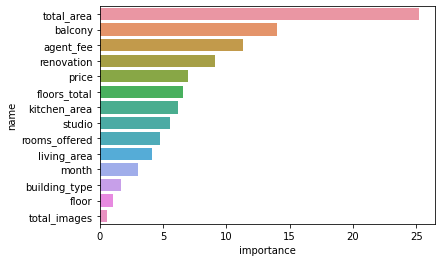

In [18]:
import seaborn as sns
all_features = cat_features + num_features
features_imp = pd.DataFrame({'importance': cat_model_3.feature_importances_,
                             'name': all_features}).sort_values(by='importance', ascending=False)
sns.barplot(x='importance', y='name', data=features_imp);

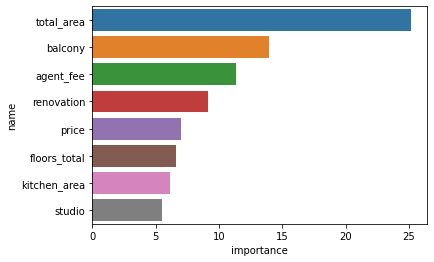

In [19]:
features_imp = features_imp.loc[features_imp ['importance']>5]
sns.barplot(x='importance', y='name', data=features_imp);

In [20]:
num_features1 = ['agent_fee', 'floors_total', 'kitchen_area', 'price', 'total_area']
cat_features1 = ['balcony', 'renovation', 'studio']
X_train1, X_test1, y_train1, y_test1 = train_test_split(data[num_features1+cat_features1], data['exposition_time'], test_size=0.3, shuffle=False)

In [21]:
cat_model_3 = catboost.CatBoostRegressor(n_estimators=300,
                                              max_depth =  7, 
                                               learning_rate = 0.05, 
                                               random_state = 0, 
                                               logging_level = 'Silent')
cat_model_3.fit(X_train1, y_train1, cat_features=cat_features1)
mae_cat = mean_absolute_error(y_test1, cat_model_3.predict(X_test1))
answer = round((mae_cat),4)

In [23]:
# Небольшая проверка для себя
import hashlib

assert hashlib.sha256(str(answer).encode()).hexdigest() == '59874d5b029abd4a56a6d323039710aa96257d9fd139c277a7ca0f52b7f61c5a'

AssertionError: 

In [24]:
# проверка, просто запустите ячейку


Подумайте, почему могли получиться такие интересные резульаты!

Напоминаем: те части кода, которые выполнялись более 30 секунд оставьте закомментированными, только с ответом в переменной.